## Name: Tensae Aschalew
## ID: GSR/3976/17
## Date: 12/20/2024
## Project: Traveling Ethiopia

# Question 1: Path Finder Functions

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def uninformed_path_finder(cities, roads, start_city, goal_city, strategy):
    if strategy == 'bfs':
        return bfs_path_finder(cities, roads, start_city, goal_city)
    elif strategy == 'dfs':
        return dfs_path_finder(cities, roads, start_city, goal_city)
    else:
        raise ValueError("Strategy must be either 'bfs' or 'dfs'")

def bfs_path_finder(cities, roads, start_city, goal_city):
    queue = deque([(start_city, [start_city], 0)])
    visited = set()
    
    while queue:
        current_city, path, cost = queue.popleft()
        
        if current_city == goal_city:
            return path, cost
        
        if current_city not in visited:
            visited.add(current_city)
            for neighbor, distance in roads[current_city]:
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor], cost + distance))
    
    return None, float('inf')

def dfs_path_finder(cities, roads, start_city, goal_city):
    stack = [(start_city, [start_city], 0)]
    visited = set()
    
    while stack:
        current_city, path, cost = stack.pop()
        
        if current_city == goal_city:
            return path, cost
        
        if current_city not in visited:
            visited.add(current_city)
            for neighbor, distance in roads[current_city]:
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor], cost + distance))
    
    return None, float('inf')


# Question 2: Traverse All Cities

In [2]:
def traverse_all_cities(cities, roads, start_city, strategy):
    if strategy == 'bfs':
        return bfs_traverse_all(cities, roads, start_city)
    elif strategy == 'dfs':
        return dfs_traverse_all(cities, roads, start_city)
    else:
        raise ValueError("Strategy must be either 'bfs' or 'dfs'")

def bfs_traverse_all(cities, roads, start_city):
    queue = deque([(start_city, [start_city], 0)])
    visited = set()
    all_cities = set(cities)
    
    while queue:
        current_city, path, cost = queue.popleft()
        
        if set(path) == all_cities:
            return path, cost
        
        if current_city not in visited:
            visited.add(current_city)
            for neighbor, distance in roads[current_city]:
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor], cost + distance))
    
    return None, float('inf')

def dfs_traverse_all(cities, roads, start_city):
    stack = [(start_city, [start_city], 0)]
    visited = set()
    all_cities = set(cities)
    
    while stack:
        current_city, path, cost = stack.pop()
        
        if set(path) == all_cities:
            return path, cost
        
        if current_city not in visited:
            visited.add(current_city)
            for neighbor, distance in roads[current_city]:
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor], cost + distance))
    
    return None, float('inf')


# Visualization

BFS Path: ['Addis Ababa', 'Bahir Dar', 'Gondar', 'Mekelle'] with cost 990


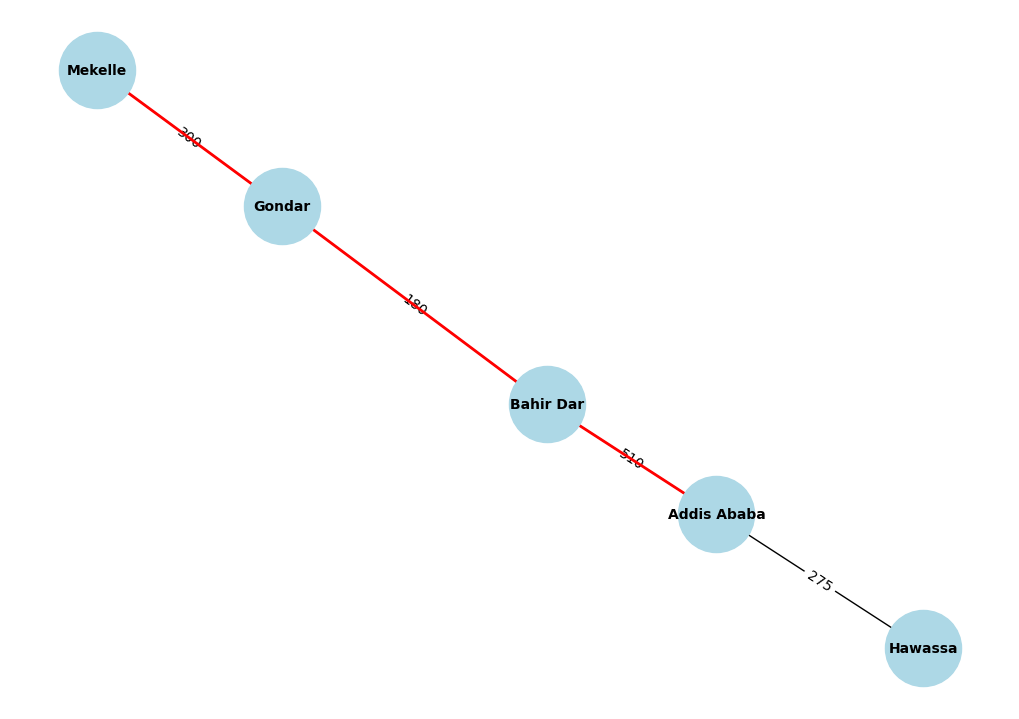

In [3]:
def visualize_graph(cities, roads, path=None):
    G = nx.Graph()
    
    for city in cities:
        G.add_node(city)
    
    for city, connections in roads.items():
        for connected_city, distance in connections:
            G.add_edge(city, connected_city, weight=distance)
    
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    plt.show()

# Example usage
cities = ['Addis Ababa', 'Bahir Dar', 'Gondar', 'Hawassa', 'Mekelle']
roads = {
    'Addis Ababa': [('Bahir Dar', 510), ('Hawassa', 275)],
    'Bahir Dar': [('Addis Ababa', 510), ('Gondar', 180)],
    'Gondar': [('Bahir Dar', 180), ('Mekelle', 300)],
    'Hawassa': [('Addis Ababa', 275)],
    'Mekelle': [('Gondar', 300)]
}

# Find path using BFS
path, cost = uninformed_path_finder(cities, roads, 'Addis Ababa', 'Mekelle', 'bfs')
print(f"BFS Path: {path} with cost {cost}")

# Visualize the graph and the path
visualize_graph(cities, roads, path)


# Advanced Challenges
## 1. Handling Dynamic Road Conditions

In [4]:
def handle_dynamic_conditions(roads, blocked_roads):
    updated_roads = {city: [] for city in roads}
    
    for city, connections in roads.items():
        for connected_city, distance in connections:
            if (city, connected_city) not in blocked_roads and (connected_city, city) not in blocked_roads:
                updated_roads[city].append((connected_city, distance))
    
    return updated_roads

# Example usage with blocked roads
blocked_roads = [('Addis Ababa', 'Bahir Dar')]
updated_roads = handle_dynamic_conditions(roads, blocked_roads)
print(updated_roads)


{'Addis Ababa': [('Hawassa', 275)], 'Bahir Dar': [('Gondar', 180)], 'Gondar': [('Bahir Dar', 180), ('Mekelle', 300)], 'Hawassa': [('Addis Ababa', 275)], 'Mekelle': [('Gondar', 300)]}


## 2. Finding k-Shortest Paths

In [5]:
import heapq

def k_shortest_paths(cities, roads, start_city, goal_city, k):
    def dijkstra_k_paths():
        heap = [(0, start_city, [start_city])]
        paths = []
        
        while heap and len(paths) < k:
            cost, current_city, path = heapq.heappop(heap)
            
            if current_city == goal_city:
                paths.append((path, cost))
                continue
            
            for neighbor, distance in roads[current_city]:
                if neighbor not in path:
                    heapq.heappush(heap, (cost + distance, neighbor, path + [neighbor]))
        
        return paths
    
    return dijkstra_k_paths()

# Example usage for k-shortest paths
k_paths = k_shortest_paths(cities, roads, 'Addis Ababa', 'Mekelle', 3)
for i, (path, cost) in enumerate(k_paths):
    print(f"Path {i+1}: {path} with cost {cost}")


Path 1: ['Addis Ababa', 'Bahir Dar', 'Gondar', 'Mekelle'] with cost 990
